In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Lab 5. Analysis of Survival data using R
---

## Kaplan-Meier
---

Let us start by considering the data from the first practical exercise in your notes: 

t$_i: 75 \quad 10 \quad 105 \quad 16 \quad 240 \quad 44 \quad 56+ \quad 27 \quad 92+ \quad 158$ days

Let's create a table with the study data:

In [3]:
Input = ("
lifetime status
75  1
10  1
105 1
16  1
240 1
44  1
56  0
27  1
92  0
158 1
")
SData = read.table(textConnection(Input),header=TRUE) 
SData

lifetime,status
<int>,<int>
75,1
10,1
105,1
16,1
240,1
44,1
56,0
27,1
92,0


The lifetimes or follow-up times are entered into column 1 and the status of each subject entered into column 2, with the event (death) coded as 1 and censored (alive) coded 0.

To run the survival analysis, you will need to download and load the packages survival and survminer. 



In [4]:
install.packages("survival")
library(survival)


The downloaded binary packages are in
	/var/folders/3m/hvvbkscs3g18gqtdpjbjc7l80000gn/T//RtmpdYLW78/downloaded_packages


In [5]:
install.packages("survminer")
library(survminer)

also installing the dependencies ‘corrplot’, ‘markdown’, ‘png’, ‘jpeg’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘exactRankTests’, ‘KMsurv’, ‘km.ci’, ‘gridtext’, ‘ggpubr’, ‘gridExtra’, ‘maxstat’, ‘survMisc’, ‘ggtext’





The downloaded binary packages are in
	/var/folders/3m/hvvbkscs3g18gqtdpjbjc7l80000gn/T//RtmpdYLW78/downloaded_packages


Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma




First, we want to calculate the Kaplan-Meier curve that illustrates the survival function

In [6]:
## Add survival object
SData$SurvObj <- with(SData, Surv(lifetime, status == 1)) 
SData

lifetime,status,SurvObj
<int>,<int>,<Surv>
75,1,"75, 1"
10,1,"10, 1"
105,1,"105, 1"
16,1,"16, 1"
240,1,"240, 1"
44,1,"44, 1"
56,0,"56, 0"
27,1,"27, 1"
92,0,"92, 0"


In [7]:
# Kaplan-Meier estimator.
km.as.one <- survfit(SurvObj ~ 1, data = SData, conf.type = "plain")

## Show object
km.as.one

Call: survfit(formula = SurvObj ~ 1, data = SData, conf.type = "plain")

      n events median 0.95LCL 0.95UCL
[1,] 10      8     75      27     158

With large data sets you may not wish to request a print of the “Survival table(s)” or function values as these can cover many pages. However, in this exercise it is helpful to list the values and compare them to the results you obtained in class.

In [8]:
summary(km.as.one)

Call: survfit(formula = SurvObj ~ 1, data = SData, conf.type = "plain")

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   10     10       1     0.90  0.0949        0.714        1.000
   16      9       1     0.80  0.1265        0.552        1.000
   27      8       1     0.70  0.1449        0.416        0.984
   44      7       1     0.60  0.1549        0.296        0.904
   75      5       1     0.48  0.1640        0.159        0.801
  105      3       1     0.32  0.1703        0.000        0.654
  158      2       1     0.16  0.1416        0.000        0.438
  240      1       1     0.00     NaN          NaN          NaN

The table of the survival function S(t) = P(T > t) gives the probability of survival beyond specific times. For example, the probability of survival beyond 44 days is 0.6 (60%).

Also, R reports the standard error (Greenwood formula) of each estimated survival probability and the 95% confidence intervals. With the option “plain” the CI is obtained using

> Estimate ± 1.96 SE(Estimate)

At 44 days for example, S(44) = 0.6, with SE = 0.155.

$$\implies CI_{95\%} = 0.60 – 1.96 \times (0.155) = 0.29 \, \text{ to } \, 0.60 + 1.96 \times (0.155) = 0.90$$
$$ (29\% \, \text{ to } \,  90\%)$$ 

Observe that the probability that the event does happen is 1- probability that it doesn’t.

Thus, the probability of death on or before day 44 is 1 - 0.6 = 0.4 (40%) with approximate 95% confidence limits 1 - 0.9 = 0.1 to 1 - 0.29 = 0.71 (10% to 71%).


###Graphical output
---

The survival curve gives the probability that the event doesn’t happen.

We can plot the survival function (with or without confidence interval) asking to mark the censored data

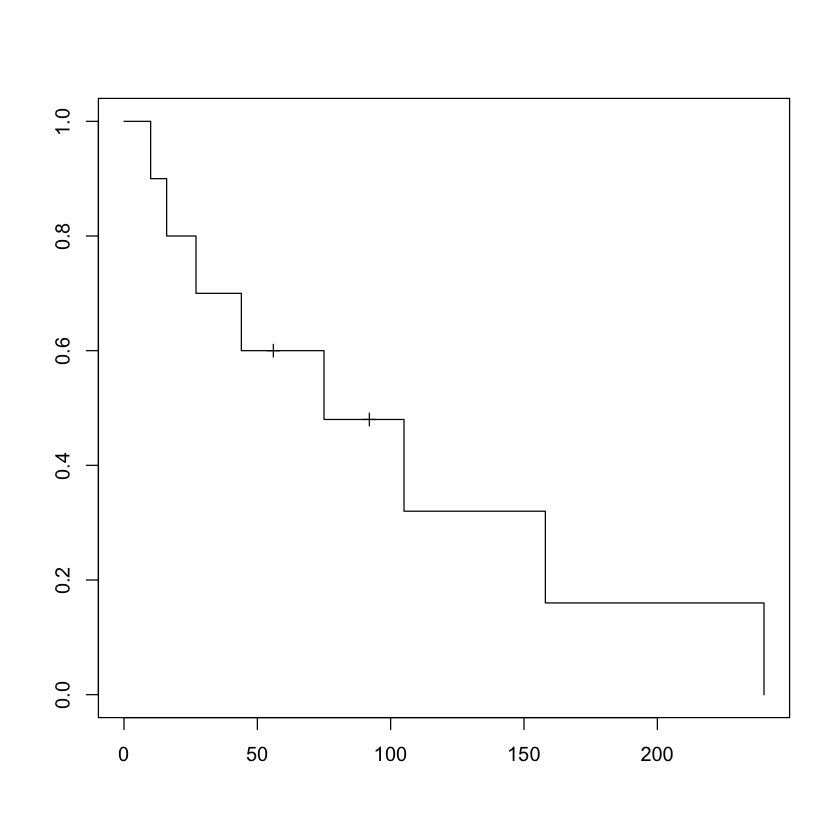

In [9]:
 ## Plot
plot(km.as.one,conf.int = FALSE, mark.time = TRUE)

The (cumulative) survival curve above displays exponential decay, which is typical if lifetimes follow and exponential probability distribution.

A plot of “one minus survival curve” gives the Cumulative Distribution Function (CDF) and indicates the probability that the event does happen on or before the specified time point.


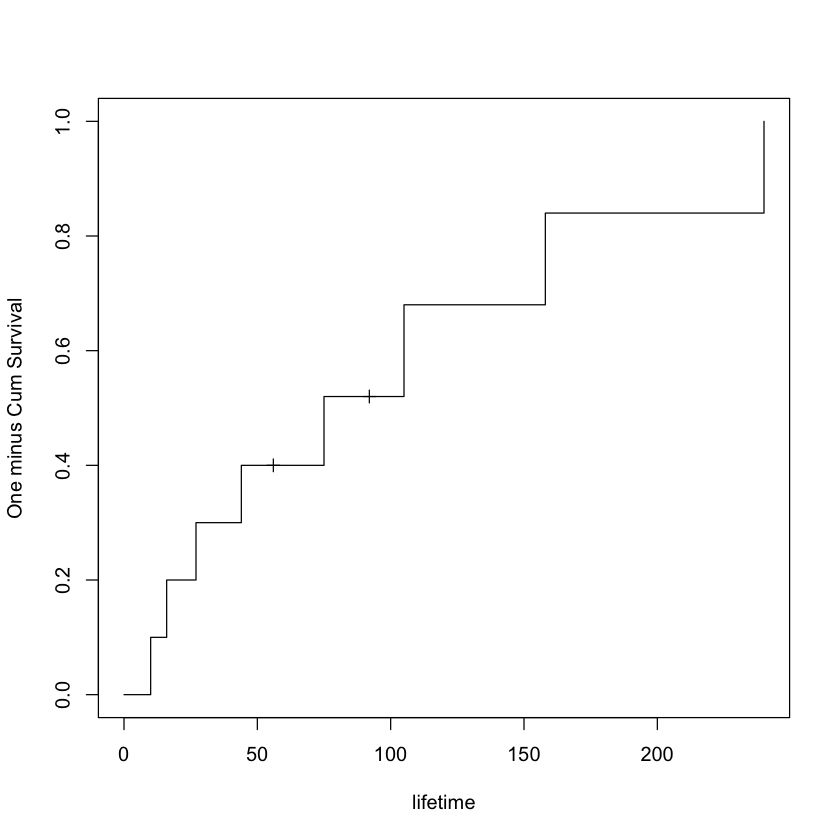

In [10]:
## Plot 1-S(t)
plot(km.as.one, fun=function(y)1-y,conf.int = FALSE,mark.time = TRUE, xlab="lifetime", ylab="One minus Cum Survival")

### Practical exercise 1

The following data come from the BMJ article by Bland & Altman and can be found in the SPSS data file “Bland & Altman Kaplan Meier data.sav” provided on Moodle:

Time (months) to conception or censoring in 38 sub-fertile women after laparoscopy and hydrotubation: 

Conceived: $1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 4, 4, 4, 6, 6, 9, 9, 9, 10, 13, 16$

Did not conceive: $2, 3,4, 7, 7, 8, 8, 9, 9, 11, 24, 24$

Use R to produce obtain the Kaplan Meier survivor estimate of S(t) and associated plots for these data. What is the “average” time to event in this study? What are the 95% confidence limits?

In [24]:
library(haven)
dataset <- read_sav("./Lab_5_Data/SPSS1_Bland_Altman_Kaplan_Meier_data.sav")
head(dataset)

FUTIME,STATUS
<dbl>,<dbl+lbl>
1,1
1,1
1,1
1,1
1,1
1,1


In [26]:
dataset$SurvObj <- with(dataset, Surv(FUTIME, STATUS == 1)) 
dataset

FUTIME,STATUS,SurvObj
<dbl>,<dbl+lbl>,<Surv>
1,1,"1, 1"
1,1,"1, 1"
1,1,"1, 1"
1,1,"1, 1"
1,1,"1, 1"
1,1,"1, 1"
2,1,"2, 1"
2,1,"2, 1"
2,1,"2, 1"


In [27]:
 # Kaplan-Meier estimator.
km.as.one <- survfit(SurvObj ~ 1, data = dataset, conf.type = "plain")

## Show object
km.as.one

Call: survfit(formula = SurvObj ~ 1, data = dataset, conf.type = "plain")

      n events median 0.95LCL 0.95UCL
[1,] 38     25      6       3      10

How do you interpret the plots of the survivor function and one minus the survivor function in this study? Which might be the more useful in the context of this study?

In [28]:
summary(km.as.one)

Call: survfit(formula = SurvObj ~ 1, data = dataset, conf.type = "plain")

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1     38       6    0.842  0.0592       0.7262        0.958
    2     32       5    0.711  0.0736       0.5663        0.855
    3     26       3    0.629  0.0789       0.4740        0.783
    4     22       3    0.543  0.0822       0.3818        0.704
    6     18       2    0.483  0.0834       0.3191        0.646
    9     12       3    0.362  0.0869       0.1916        0.532
   10      6       1    0.302  0.0910       0.1233        0.480
   13      4       1    0.226  0.0944       0.0411        0.411
   16      3       1    0.151  0.0880       0.0000        0.323

What proportion of women are not pregnant after six months following treatment? Can you put approximate 95% confidence limits on your estimate?

<font color=cyan>48.3% of the women will not be be pregnant after the 6 months. The confidence intervals are 31.91% on the lower 95% and 64.6% on the upper 95% confidence interval.</font>

What proportion of women become pregnant within six months following treatment? Can you put approximate 95% confidence limits on your estimate?

In [39]:
g = 1 - 0.483
h = 1 - 0.3191 
i = 1 - 0.646
print(g)
print(h)
print(i)

[1] 0.517
[1] 0.6809
[1] 0.354


<font color=cyan>To determine in the number pregnant we can do 1 - !pregnant which gives us 51.7% are pregnant with a Lower CI of 68.09 and a upper CI of 35.4</font>


## Using R to compare two survivor functions

Create a new data table (Data), as seen at the beginning of this session, with the follow-up times, status and treatment codes for the following patients with chronic heart failure treated with either placebo or Milrinone:

1 = Milrinone: 39 \, 99+ \, 211 \, 249+ \, 366+ \, 366+ \, 366+ 

2 = Placebo: 19 \, 29+ \, 49 \, 69 \, 131 \, 131\, 389+

In [40]:
Input = ("
treatment lifetime died
1 39  1
1 99 0
1 211 1
1 249 0
1 366 0
1 366 0
1 366 0
2 19 1
2 29 0
2 49 1
2 69 1
2 131 1
2 131 1
2 389 0
")
Data = read.table(textConnection(Input),header=TRUE) 
Data

treatment,lifetime,died
<int>,<int>,<int>
1,39,1
1,99,0
1,211,1
1,249,0
1,366,0
1,366,0
1,366,0
2,19,1
2,29,0


We can calculate and plot the overall Kaplan-Meier curve as follows

In [12]:
## Add survival object
surv.object <- with(Data, Surv(lifetime, died)) 

## Kaplan-Meier estimator
kmall <- survfit(surv.object~1, data=Data, conf.type = "plain") 

In [13]:
## Show object
summary(kmall)

Call: survfit(formula = surv.object ~ 1, data = Data, conf.type = "plain")

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   19     14       1    0.929  0.0688        0.794        1.000
   39     12       1    0.851  0.0973        0.660        1.000
   49     11       1    0.774  0.1152        0.548        1.000
   69     10       1    0.696  0.1270        0.447        0.945
  131      8       2    0.522  0.1430        0.242        0.803
  211      6       1    0.435  0.1432        0.155        0.716

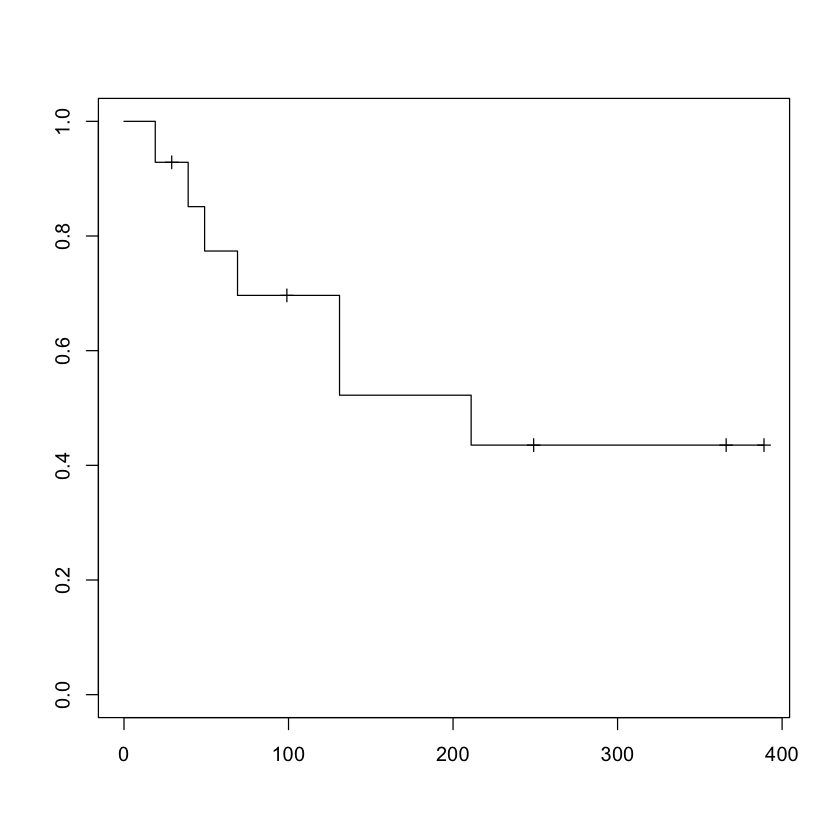

In [14]:
## Plot
plot(kmall,conf.int = FALSE, mark.time = TRUE)

If we want to obtain two different curves for the two treatments, then we need to use

In [15]:
## Kaplan-Meier estimator
kmrx <- survfit(surv.object~treatment,data=Data) 
summary(kmrx)

Call: survfit(formula = surv.object ~ treatment, data = Data)

                treatment=1 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   39      7       1    0.857   0.132        0.633            1
  211      5       1    0.686   0.186        0.403            1

                treatment=2 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   19      7       1    0.857   0.132       0.6334            1
   49      5       1    0.686   0.186       0.4026            1
   69      4       1    0.514   0.204       0.2365            1
  131      3       2    0.171   0.156       0.0289            1


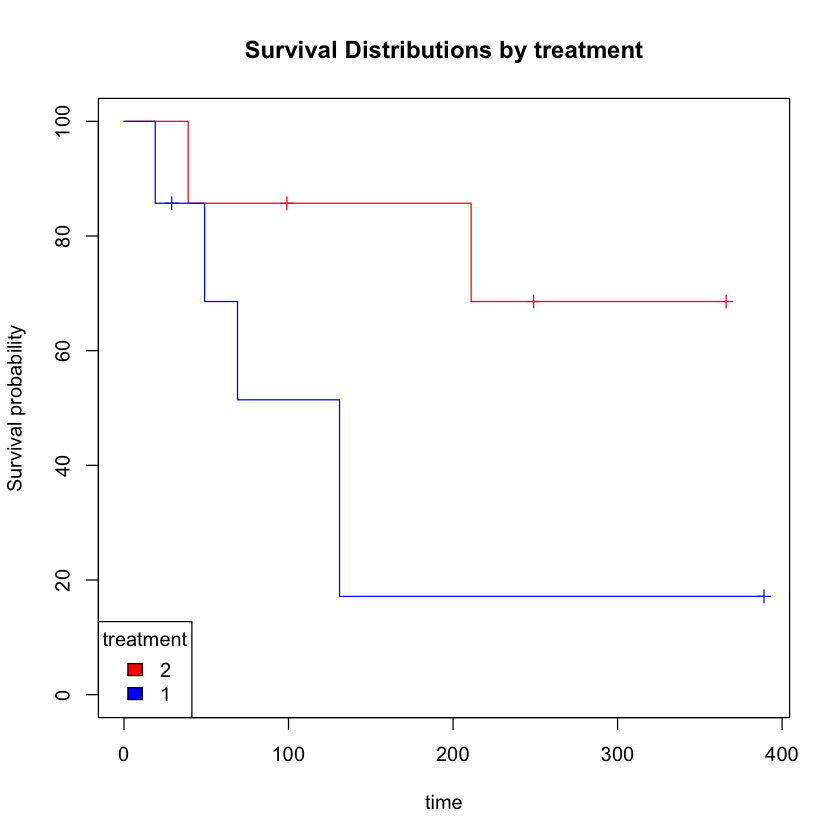

In [16]:
## Plot
plot(kmrx, xlab="time",ylab="Survival probability", yscale=100, col=c("red","blue"), main="Survival Distributions by treatment",
conf.int = FALSE, mark.time = TRUE)
legend("bottomleft", title="treatment", c("2", "1"), fill=c("red", "blue"))

What is the difference between the summaries of these two cases?

Another method to plot the two curves is the following:

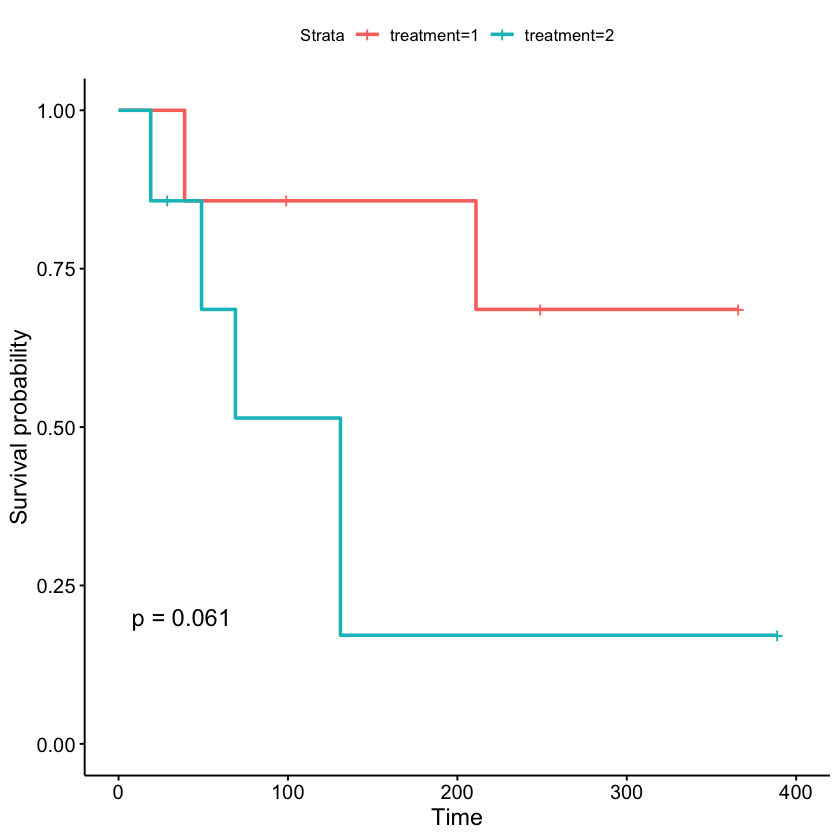

In [17]:
 ## Plot
ggsurvplot(kmrx, data = Data, pval = TRUE)

## Test Statistics for Equality of Survival Distributions: Log-rank test

To run the logrank test we need to use the command `survdiff`

In [18]:
 ## Logrank test
survdiff(surv.object ~ treatment,data=Data)

Call:
survdiff(formula = surv.object ~ treatment, data = Data)

            N Observed Expected (O-E)^2/E (O-E)^2/V
treatment=1 7        2     4.31      1.24      3.51
treatment=2 7        5     2.69      1.99      3.51

 Chisq= 3.5  on 1 degrees of freedom, p= 0.06 

Note that the Logrank chi-square statistic produced here 3.5, differs slightly from that in the notes, 3.22, due to a slight variation in the formula used. In this study the test of equivalence leads to a non-significant (although borderline) result.

### Practical exercise 2

The following data come from the second BMJ article by Bland & Altman and can be found in the SPSS data file “Bland & Altman Logrank data.sav” provided on Moodle.

The data record time to death (weeks) or censoring in adults with recurrent gliomas of two types, Astrocytoma or Glioblastoma. The data are reproduced below:

A: 6 13 21 30 31+ 37 38 47+ 49 50 63 79 80+ 82+ 82+ 86 98 149+ 202 219 weeks

G: 10 10 10 13 14 15 16 17 18 20 24 24 25 28 30 33 34+ 35 37 40 40 40+ 46 48 70+ 76 81 82 91 112 181 weeks

Obtain a plot of the Kaplan Meier survival curves for these two population subgroups. Do these two groups of individuals seem to experience similar or different survival patterns? Which seems to have the better survival based on a visual inspection of the survival curves?


In [52]:
dataset2 <- read_sav("./Lab_5_Data/SPSS2_Bland_Altman_Logrank_data.sav")
head(dataset2)

## Add survival object
surv.object <- with(dataset2, Surv(LIFETIME, STATUS)) 

## Kaplan-Meier estimator
kmall <- survfit(surv.object~1, data=dataset2, conf.type = "plain") 

## Show object
summary(kmall)



LIFETIME,STATUS,DISEASE
<dbl>,<dbl+lbl>,<dbl+lbl>
6,1,1
13,1,1
21,1,1
30,1,1
31,0,1
37,1,1


Call: survfit(formula = surv.object ~ 1, data = dataset2, conf.type = "plain")

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    6     51       1   0.9804  0.0194       0.9423        1.000
   10     50       3   0.9216  0.0376       0.8478        0.995
   13     47       2   0.8824  0.0451       0.7939        0.971
   14     45       1   0.8627  0.0482       0.7683        0.957
   15     44       1   0.8431  0.0509       0.7433        0.943
   16     43       1   0.8235  0.0534       0.7189        0.928
   17     42       1   0.8039  0.0556       0.6950        0.913
   18     41       1   0.7843  0.0576       0.6714        0.897
   20     40       1   0.7647  0.0594       0.6483        0.881
   21     39       1   0.7451  0.0610       0.6255        0.865
   24     38       2   0.7059  0.0638       0.5808        0.831
   25     36       1   0.6863  0.0650       0.5589        0.814
   28     35       1   0.6667  0.0660       0.5373        0.796
   30     34       2   0

Call: survfit(formula = surv.object ~ DISEASE, data = dataset2)

                DISEASE=1 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    6     20       1    0.950  0.0487        0.859        1.000
   13     19       1    0.900  0.0671        0.778        1.000
   21     18       1    0.850  0.0798        0.707        1.000
   30     17       1    0.800  0.0894        0.643        0.996
   37     15       1    0.747  0.0981        0.577        0.966
   38     14       1    0.693  0.1046        0.516        0.932
   49     12       1    0.636  0.1107        0.452        0.894
   50     11       1    0.578  0.1147        0.392        0.853
   63     10       1    0.520  0.1169        0.335        0.808
   79      9       1    0.462  0.1173        0.281        0.760
   86      5       1    0.370  0.1251        0.191        0.718
   98      4       1    0.277  0.1233        0.116        0.663
  202      2       1    0.139  0.1158        0.027        0.713
  219      1

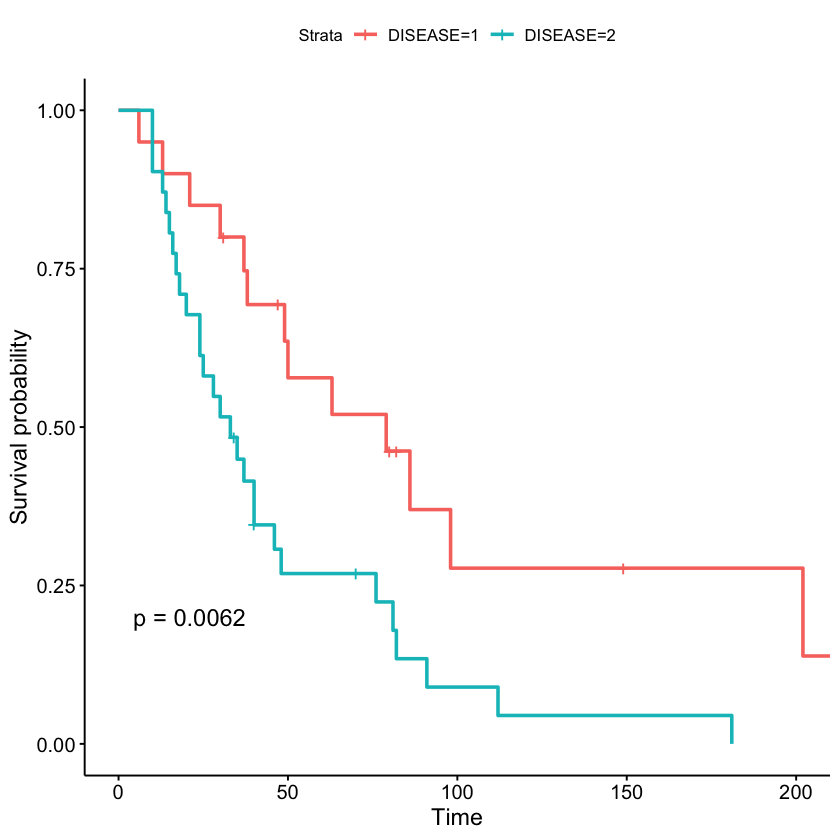

In [54]:
kmrx <- survfit(surv.object~DISEASE,data=dataset2) 
summary(kmrx)

ggsurvplot(kmrx, data = dataset2, pval = TRUE)

What are the median survival times for each subgroup?

What proportion of patients with Astrocytoma survive beyond 50 weeks? Give approximate 95% limits for your answer.

<font color=cyan>57.8% of people survive beyond 50 weeks with a lower confidence interval of 39.2% and an upper confidence interval of 85.3%</font>

What proportion of patients with Glioblastoma die within 30 weeks or less? Give approximate 95% limits for your answer.

In [56]:
proportion30Weeks = 1 - 0.800
upperCI30Weeks = 1 - 0.643
lowerCI30Weeks = 1 - 0.996

print(proportion30Weeks)
print(upperCI30Weeks)
print(lowerCI30Weeks)

[1] 0.2
[1] 0.357
[1] 0.004


<font color=cyan>20% of people die before 30 weeks with a lower confidence of 0.4% and an upper confidence of 35.7% </font>

Carry out the Logrank test to determine if these two types of brain tumour lead to significantly different survival patterns? What do you conclude?

In [57]:
survdiff(surv.object ~DISEASE,data=dataset2)

Call:
survdiff(formula = surv.object ~ DISEASE, data = dataset2)

           N Observed Expected (O-E)^2/E (O-E)^2/V
DISEASE=1 20       14     22.5      3.19      7.49
DISEASE=2 31       28     19.5      3.67      7.49

 Chisq= 7.5  on 1 degrees of freedom, p= 0.006 

## Fitting Cox regression models

### Example 1

We shall begin by revisiting the Bland & Altman data on Gliomas recurrence data contained in the file “Bland & Altman Logrank data.sav”.

Recall that the data file holds lifetime (in weeks) and censoring status in adults with recurrent gliomas of two types (disease), Astrocytoma or Glioblastoma.

To run the Cox PH regression, use the function `coxph` as follows

In [58]:
Data<-read_sav("./Lab_5_Data/SPSS2_Bland_Altman_Logrank_data.sav")

In [59]:
## Add survival object
surv.object <- with(Data, Surv(LIFETIME, STATUS)) 

In [60]:
## Fit a Cox proportional hazards model
Data$DISEASE [Data$DISEASE == 2] <- 0
Mod <- coxph(surv.object ~ DISEASE,data=Data)
Mod

Call:
coxph(formula = surv.object ~ DISEASE, data = Data)

           coef exp(coef) se(coef)      z       p
DISEASE -0.9270    0.3958   0.3497 -2.651 0.00803

Likelihood ratio test=7.68  on 1 df, p=0.005588
n= 51, number of events= 42 

As for the logistic regression you can consider more than one categorical predictors. In this case we only use DISEASE.

The confidence limits for the hazard ratios can be found in the summary of Mod. The Likelihood ratio test (in `Mod`) assesses the **overall significance** of **all** predictors in the model. In this case 7.68 is the test statistic for the model, and the overall p-value, 0.006, indicates that the model contains useful information. Thus, there is evidence that (the single predictor) disease type significantly predicts survival time.

In multivariate models containing several predictor variables further investigation is required to determine which variables **significantly predict** outcome and to obtain estimates of their effect.

The hazard ratios can be found in the summary:

In [61]:
## Coefficients and their significance, hazard ratios and CI
summary(Mod)

Call:
coxph(formula = surv.object ~ DISEASE, data = Data)

  n= 51, number of events= 42 

           coef exp(coef) se(coef)      z Pr(>|z|)   
DISEASE -0.9270    0.3958   0.3497 -2.651  0.00803 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

        exp(coef) exp(-coef) lower .95 upper .95
DISEASE    0.3958      2.527    0.1994    0.7854

Concordance= 0.609  (se = 0.042 )
Likelihood ratio test= 7.68  on 1 df,   p=0.006
Wald test            = 7.03  on 1 df,   p=0.008
Score (logrank) test = 7.5  on 1 df,   p=0.006


The p- value for the “Wald test”, 0.008, is slightly different from the value for overall significance indicated in the Likelihood ratio test due to a slight variation in the test procedure.

As Maximum Likelihood Estimates (MLE’s) are asymptotically normally distributed we can use a Z test to check significance. Based on the table above:

> Z = B/SE(B) = -0.927/0.350 = -2.65 exceeds $\pm$ 1.96 indicating significance.

> NB. Z$^2$ = 2.65$^2$ = 7.023, the  Wald statistic follows a Chi-square distribution on 1 df

The Hazard Ratio, Exp(coef) = 0.396, is less than 1.0 indicating that subjects with Astrocytoma (disease type 1) have a lower risk of death (better survival) compared to Glioblastoma patients.


In [62]:
##Compute the fitting function
hzfit<-survfit(Mod)

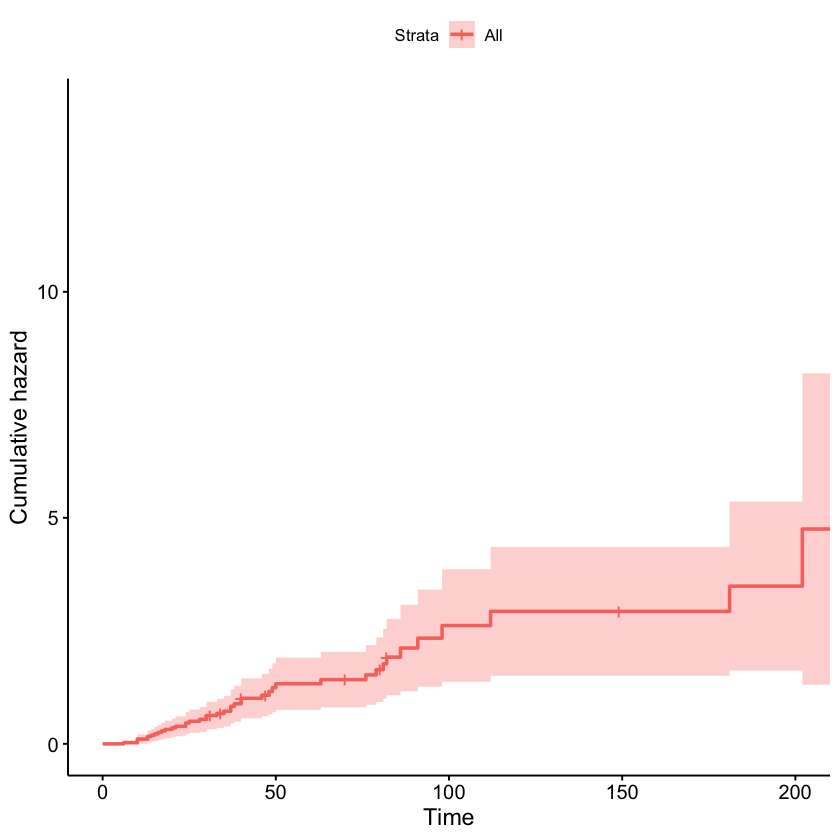

In [63]:
ggsurvplot(hzfit, fun = "cumhaz",data=Data)

### Example 2

Krall, Uthoff, and Harley (1975) analyzed data from a study on multiple **myeloma** in which researchers treated
65 patients with alkylating agents. Of those patients, 48 died during the study and 17 survived.

Survival time is measured in months from diagnosis and interest lay in identifying important prognostic factors from the following nine explanatory variables:

X1 - LOGBUN (log BUN at diagnosis),

X2 - HGB (hemoglobin at diagnosis),

X3 - PLATELET (platelets at diagnosis: 0 = abnormal, 1 = normal), 

X4 - AGE (age at diagnosis in years),

X5 - LOGWBC (log WBC at diagnosis),

X6 - FRAC (fractures at diagnosis: 0 = none, 1 = present),

X7 - LOGPBM (log percentage of plasma cells in bone marrow), 

X8 - PROTEIN (proteinuria at diagnosis), and

X9 - SCALC (serum calcium at diagnosis).

These data can be found in the file “SPSS myeloma data”.
Note that predictor variables with very skewed distributions are often transformed to reduce the risk of extreme values exerting strong influence on parameter estimates, hence the use of logarithmic transformations above (X1, X5 X7).
Use R to understand which of the variables are good predictors for myeloma.

In this case the Cox regression is multinomial, this needs to be specified as follows:

In [66]:
## Myeloma Data
DataM <- read_sav("./Lab_5_Data/SPSS4_Myeloma_data.sav")
head(DataM)

time,status,x1,x2,x3,x4,x5,x6,x7,x8,x9
<dbl>,<dbl+lbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2.2175,9.4,1,67,3.6628,1,1.9542,12,10
1,1,1.9395,12.0,1,38,3.9868,1,1.9542,20,18
2,1,1.5185,9.8,1,81,3.8751,1,2.0000,2,15
2,1,1.7482,11.3,0,75,3.8062,1,1.2553,0,12
2,1,1.3010,5.1,0,57,3.7243,1,2.0000,3,9
3,1,1.5441,6.7,1,46,4.4757,0,1.9345,12,10


In [67]:
## Create survival object
surv.Mobject <- with(DataM, Surv(time, status==1)) 

In [68]:
 ## Fit a Cox proportional hazards model
MMod <- coxph(surv.Mobject ~ x1+x2+x3+x4+x5+x6+x7+x8+x9,data=DataM)
MMod

Call:
coxph(formula = surv.Mobject ~ x1 + x2 + x3 + x4 + x5 + x6 + 
    x7 + x8 + x9, data = DataM)

       coef exp(coef) se(coef)      z       p
x1  1.85557   6.39536  0.65628  2.827 0.00469
x2 -0.12629   0.88136  0.07212 -1.751 0.07994
x3 -0.25488   0.77501  0.51194 -0.498 0.61858
x4 -0.01306   0.98702  0.01957 -0.668 0.50439
x5  0.35389   1.42460  0.71576  0.494 0.62101
x6  0.34232   1.40821  0.40725  0.841 0.40059
x7  0.38165   1.46470  0.48743  0.783 0.43364
x8  0.01302   1.01311  0.02612  0.498 0.61817
x9  0.12976   1.13856  0.10502  1.236 0.21659

Likelihood ratio test=17.62  on 9 df, p=0.03991
n= 65, number of events= 48 

In [69]:
install.packages("broom")
install.packages("knitr")


The downloaded binary packages are in
	/var/folders/3m/hvvbkscs3g18gqtdpjbjc7l80000gn/T//RtmpdYLW78/downloaded_packages

The downloaded binary packages are in
	/var/folders/3m/hvvbkscs3g18gqtdpjbjc7l80000gn/T//RtmpdYLW78/downloaded_packages


In [70]:
broom::tidy(
  coxph(surv.Mobject ~ x1+x2+x3+x4+x5+x6+x7+x8+x9,data=DataM), 
  exp = TRUE
  ) %>% 
  knitr::kable()



|term |  estimate| std.error|  statistic|   p.value|
|:----|---------:|---------:|----------:|---------:|
|x1   | 6.3953594| 0.6562820|  2.8274015| 0.0046927|
|x2   | 0.8813598| 0.0721234| -1.7510177| 0.0799429|
|x3   | 0.7750097| 0.5119399| -0.4978704| 0.6185754|
|x4   | 0.9870231| 0.0195655| -0.6675979| 0.5043903|
|x5   | 1.4245973| 0.7157617|  0.4944232| 0.6210073|
|x6   | 1.4082067| 0.4072451|  0.8405678| 0.4005901|
|x7   | 1.4646990| 0.4874317|  0.7829810| 0.4336383|
|x8   | 1.0131071| 0.0261249|  0.4984488| 0.6181677|
|x9   | 1.1385592| 0.1050166|  1.2356483| 0.2165893|

|term |  estimate| std.error|  statistic|   p.value|
|:----|---------:|---------:|----------:|---------:|
|x1   | 6.3953594| 0.6562820|  2.8274015| 0.0046927|
|x2   | 0.8813598| 0.0721234| -1.7510177| 0.0799429|
|x3   | 0.7750097| 0.5119399| -0.4978704| 0.6185754|
|x4   | 0.9870231| 0.0195655| -0.6675979| 0.5043903|
|x5   | 1.4245973| 0.7157617|  0.4944232| 0.6210073|
|x6   | 1.4082067| 0.4072451|  0.8405678| 0.4005901|
|x7   | 1.4646990| 0.4874317|  0.7829810| 0.4336383|
|x8   | 1.0131071| 0.0261249|  0.4984488| 0.6181677|
|x9   | 1.1385592| 0.1050166|  1.2356483| 0.2165893|

The **“categorical”** predictors X3 and X6 have already been coded as indicator 0/1 variables, if it wasn’t so you had to indicate they had to be treated as factors, writing `factor(X3)` and `factor(X4)`.

Note that you can request the **baseline function** to be displayed. This will lead to the baseline hazard or survival functions to be displayed which can be adjusted to give survival probabilities for different patient profiles.


In [71]:
##Compute the fitting function
hsfit<-survfit(MMod)

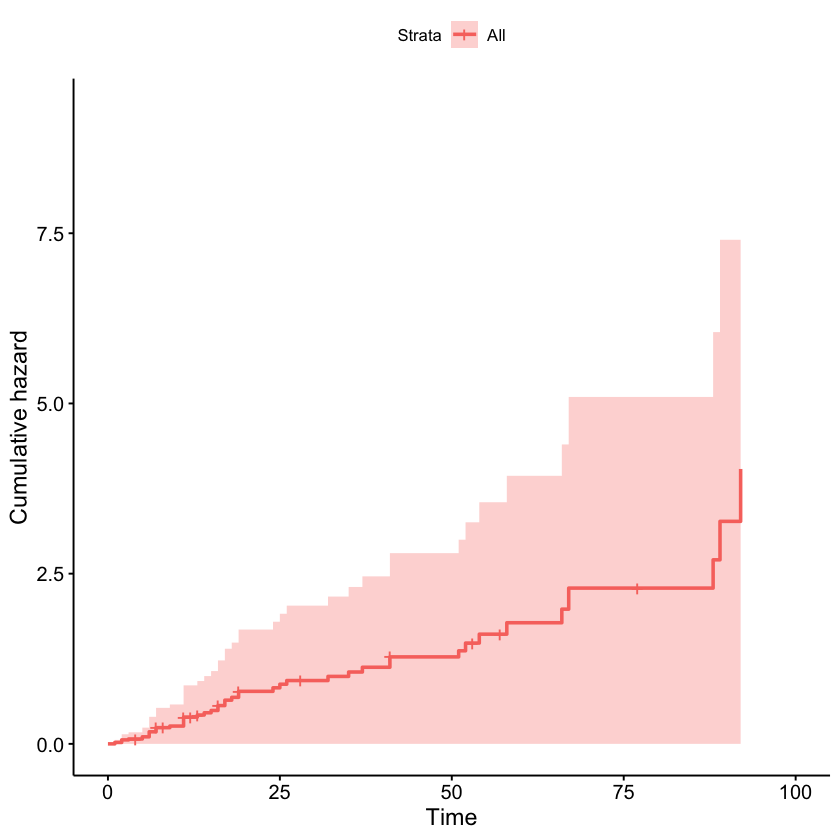

In [72]:
##Now you can graph the baseline cumulative hazard with
ggsurvplot(hsfit,fun="cumhaz",data=DataM)

To see the log-log and save it in a variable we have to write

In [73]:
##extract the information into a variable with the following commands

cumulative.hazard<- -log(hsfit$surv) 
LML <- log(cumulative.hazard)

The p value for the overall significance of the model, 0.04, indicates that the set of predictors contain useful information. Further investigation is warranted to determine which predictors are statistically significant.

In [74]:
summary(MMod)

Call:
coxph(formula = surv.Mobject ~ x1 + x2 + x3 + x4 + x5 + x6 + 
    x7 + x8 + x9, data = DataM)

  n= 65, number of events= 48 

       coef exp(coef) se(coef)      z Pr(>|z|)   
x1  1.85557   6.39536  0.65628  2.827  0.00469 **
x2 -0.12629   0.88136  0.07212 -1.751  0.07994 . 
x3 -0.25488   0.77501  0.51194 -0.498  0.61858   
x4 -0.01306   0.98702  0.01957 -0.668  0.50439   
x5  0.35389   1.42460  0.71576  0.494  0.62101   
x6  0.34232   1.40821  0.40725  0.841  0.40059   
x7  0.38165   1.46470  0.48743  0.783  0.43364   
x8  0.01302   1.01311  0.02612  0.498  0.61817   
x9  0.12976   1.13856  0.10502  1.236  0.21659   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

   exp(coef) exp(-coef) lower .95 upper .95
x1    6.3954     0.1564    1.7670    23.147
x2    0.8814     1.1346    0.7652     1.015
x3    0.7750     1.2903    0.2841     2.114
x4    0.9870     1.0131    0.9499     1.026
x5    1.4246     0.7020    0.3503     5.794
x6    1.4082     0.7101    0.6339  

This table indicates the relative importance of each variable in the model.

Initial investigation suggests that only LogBun (X1, **p = 0.005**) is a significant predictor of survival with HGB (X2, p = 0.08) borderline at the 5% level.

(A backward selection procedure reduces the model to one involving only these two predictors).

LogBun (X1) has a positive coefficient indicating that a high level of this variable is associated with **poor** prognosis. The exponential of the regression coefficient, 6.4, provides an estimate of the hazard ratio (relative risk) indicating that an increase of 1 unit in this variable is associated with a six-fold increase in the risk of death.

Hemoglobin (X2) has a negative coefficient, that is when its value is higher than average values, it indicates better prognosis. An increase of 1 unit in this variable is associated with a relative risk reduction of 12% (from 1-0.881).

X3 is a **binary predictor** in which 1 = normal. Here the HR, 0.775, indicates that a normal platelet level is associated with a 22.2% reduction in risk of death, although the risk in this case is **not statistically significant** after adjustment for other variables in the model (p = 0.621)

**What do you obtain using the command: ggforest(MMod, data = DataM)?**

### Practical exercise 3

The data file “**SPSS Bladder cancer data**” contains the following data relating to time to recurrence for 86 patients with bladder cancer:

patient time status treatment tumours maxsize

* patient number (1 to 86) – time to recurrence
* 1 = recurrence, 0 = censored - 1 = placebo, 2 = Thiotepa
* number of tumours
* maximum size of largest tumour

Open this data file.
Fit a Cox regression model to identify significant predictors of time to recurrence. 

Note that you need to declare
treatment as categorical and **change** reference group to the **first** group. 

Interpret the Hazard Ratio for the test treatment, Thiotepa, relative to placebo? Does Thiotepa have a significant effect upon time to recurrence?

In [78]:
DataBC <- read_sav("./Lab_5_Data/SPSS_Bladder_cancer_data.sav")
head(DataBC)

PATIENT,TIME,STATUS,TREAT,TUMOURS,MAXSIZE,XLNTIME
<dbl>,<dbl>,<dbl+lbl>,<dbl>,<dbl+lbl>,<dbl>,<dbl>
1,0,0,1,1,1,NA
2,1,0,1,1,3,0.0000000
3,4,0,1,2,1,0.6020600
4,7,0,1,1,1,0.8450980
5,10,0,1,5,1,1.0000000
6,6,1,1,4,1,0.7781513


Does the number of tumours predict time to recurrence? How would you interpret the hazard ratios for this predictor?

In [106]:
## Create survival object
surv.Bobject <- with(DataBC, Surv(TIME, STATUS==1)) 

BCMod <- coxph(surv.Bobject ~ TREAT+TUMOURS+MAXSIZE+XLNTIME ,data=DataBC)
BCMod

Call:
coxph(formula = surv.Bobject ~ TREAT + TUMOURS + MAXSIZE + XLNTIME, 
    data = DataBC)

            coef exp(coef) se(coef)      z        p
TREAT    4.07174  58.65893  0.62970  6.466 1.01e-10
TUMOURS  0.08958   1.09372  0.09274  0.966    0.334
MAXSIZE  0.03597   1.03662  0.09569  0.376    0.707
XLNTIME -5.24009   0.00530  0.74686 -7.016 2.28e-12

Likelihood ratio test=141.8  on 4 df, p=< 2.2e-16
n= 85, number of events= 47 
   (1 observation deleted due to missingness)

Does the size of the largest tumour predict time to recurrence? How would you interpret the hazard ratio for this predictor?


Call:
coxph(formula = surv.Bobject ~ TREAT + TUMOURS + MAXSIZE + XLNTIME, 
    data = DataBC)

  n= 85, number of events= 47 
   (1 observation deleted due to missingness)

            coef exp(coef) se(coef)      z Pr(>|z|)    
TREAT    4.07174  58.65893  0.62970  6.466 1.01e-10 ***
TUMOURS  0.08958   1.09372  0.09274  0.966    0.334    
MAXSIZE  0.03597   1.03662  0.09569  0.376    0.707    
XLNTIME -5.24009   0.00530  0.74686 -7.016 2.28e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

        exp(coef) exp(-coef) lower .95 upper .95
TREAT     58.6589    0.01705 17.073877 201.52833
TUMOURS    1.0937    0.91431  0.911928   1.31174
MAXSIZE    1.0366    0.96467  0.859344   1.25047
XLNTIME    0.0053  188.68689  0.001226   0.02291

Concordance= 0.954  (se = 0.015 )
Likelihood ratio test= 141.8  on 4 df,   p=<2e-16
Wald test            = 59.13  on 4 df,   p=4e-12
Score (logrank) test = 129.1  on 4 df,   p=<2e-16


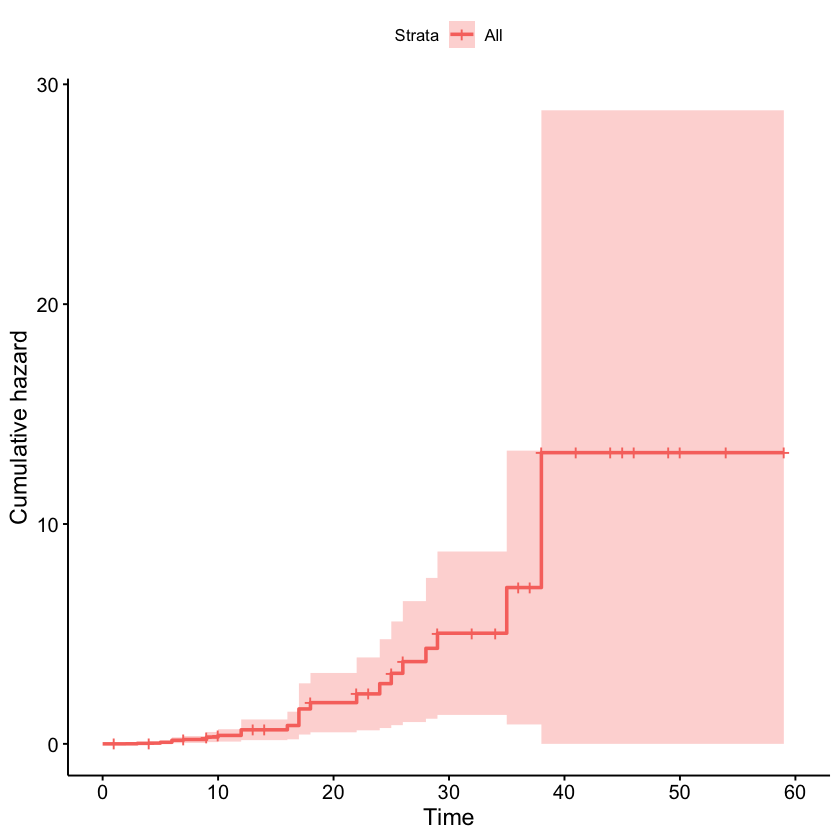

In [112]:
##Compute the fitting function
BCfit<-survfit(BCMod)

##Now you can graph the baseline cumulative hazard with
ggsurvplot(BCfit,fun="cumhaz",data=DataBC)

##extract the information into a variable with the following commands
cumulative.hazard<- -log(BCfit$surv) 
LML <- log(cumulative.hazard)

summary(BCMod)

## Checking model assumptions

In this session we will see how to:

* Check proportionality of categorical predictors visually using graphical plots
* Check proportionality of continuous predictors by fitting interactions over time
(time – dependent covariate models)

### Example 1

We shall begin by revisiting the Bland & Altman data on Gliomas recurrence data contained in the file “Bland & Altman Logrank data.sav”. Recall that the data file holds LIFETIME (in weeks) and censoring status in adults with recurrent gliomas of two types (DISEASE), Astrocytoma or Glioblastoma.

Run the **Cox regression**.

We now want to plot the “Log minus log” = Ln{ Cumulative Hazard } function.

In [ ]:
surv.object <- with(Data, Surv(LIFETIME, STATUS)) 

In [ ]:
fit=survfit(surv.object~Data$DISEASE)

In [ ]:
ggsurvplot(fit, data = Data, main="LML function for Bland & Altman data",fun = "cloglog")

If the proportionality assumption holds the vertical distance between the curves should remain fairly constant.

## Checking proportionality using time-dependent covariates

It is **not** possible to test if a **numeric** predictor satisfies the proportionality assumption using the graphical
procedure described above.

We can test proportionality of **both** numeric **and** categorical predictors by investigating if their effect is
**dependent on time** (as thus failing proportionality) using the following procedure:

Suppose `disease` does not have a constant effect, but instead the hazard ratio varies by a factor of time. Specifically, X(t) = {disease, disease * t}. To accommodate time-varying coefficients in `coxph` we need to use a counting process syntax. We will split the data using as cut points, the time points at which the events occur. This will allow us to create a key **time-varying covariate**.
  

In [ ]:
cut.points <- unique(Data$LIFETIME[Data$STATUS==1]) 
SURV <- survSplit(data = Data,
                cut = cut.points,
                end = "LIFETIME",event = "STATUS",
                start = "time0",
                id = "id", #character string with name of new id variable 
                zero = 0 # If start doesn't already exist, used as start 
                )

We will now order the variables based on the id and the initial time

In [ ]:
install.packages("doBy")

In [ ]:
## id as numeric
SURV$id <- as.numeric(SURV$id)

## Reorder
library(doBy)
SURV <- orderBy( ~ id + time0, SURV) 
View(SURV)

We now add a time dependent covariate to the Data and fit the model:

In [ ]:
SURV$diseaseT <- SURV$DISEASE * SURV$LIFETIME

Mod3 <- coxph(Surv(time0,LIFETIME, STATUS) ~ DISEASE + diseaseT, data = SURV) 
Mod3

The output suggests that disease is **not time dependent**, as the covariate “diseaseT” is not significant, p = 0.68. 

Thus we may fit a Cox regression model using disease, assuming the **proportionality** assumption holds.

Having found that the proportionality assumption holds we would remove the time dependent interaction from the model and fit a model with disease alone.


### Practical exercise 4

Open the data file “SPSS myeloma data” containing data on 65 patients with multiple myeloma. Recall that the predictors are:

X1 - LOGBUN (log BUN at diagnosis),

X2 - HGB (hemoglobin at diagnosis),

X3 - PLATELET (platelets at diagnosis: 0 = abnormal, 1 = normal), 

X4 - AGE (age at diagnosis in years),

X5 - LOGWBC (log WBC at diagnosis),

X6 - FRAC (fractures at diagnosis: 0 = none, 1 = present),

X7 - LOGPBM (log percentage of plasma cells in bone marrow), 

X8 - PROTEIN (proteinuria at diagnosis), and

X9 - SCALC (serum calcium at diagnosis).


Fit the Cox regression model using X3 alone and **save** the values of “Log minus log” (LML).

Check the proportionality assumption corresponding to this **binary** (categorical) predictor by plotting “Log
minus log” against time, producing curves for normal and abnormal platelets. 

Does the assumption of proportionality seem to hold?


Check the proportionality assumption of the **continuous** predictor LogBun, by fitting a time – dependent covariate model.

Create the time dependent covariate T_*X1.

Fit a model using this interaction term with X1, X2, ..., X9.

Does this predictor, X1, satisfy the assumption of proportionality?